In [1]:
import valenspy as vp
from dask.diagnostics import ProgressBar
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
from datatree import DataTree

In [2]:
import datatree

dt = datatree.open_datatree("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/ValEnsPy/notebooks/intermediate_data/preprocessed_data_2006_ERA5_all_1004.nc", chunks="auto")

In [7]:
dt = dt.sel(time=slice("2006-05-01","2006-06-01")) #Ensuring the data covers the same period
dt = dt.map_over_subtree(lambda x: x[["tas"]])
dt

DataTree('None', parent=None)
├── DataTree('obs')
│   └── DataTree('ERA5')
│           Dimensions:  (time: 768, lat: 141, lon: 221)
│           Coordinates:
│             * lon      (lon) float32 884B -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
│             * lat      (lat) float32 564B 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
│             * time     (time) datetime64[ns] 6kB 2006-05-01 ... 2006-06-01T23:00:00
│           Data variables:
│               tas      (time, lat, lon) float64 191MB dask.array<chunksize=(624, 55, 87), meta=np.ndarray>
│           Attributes:
│               Conventions:  CF-1.6
│               history:      2020-02-19 04:37:50 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
│               period:       2006
│               freq:         hourly
│               region:       europe
│               dataset:      ERA5
└── DataTree('mod')
    ├── DataTree('ALARO_original')
    │       Dimensions:  (time: 768, lat: 141, lon: 221)
    │       Coordinates:
    │         * time     (time) datetime64[ns] 6kB 2006-05-01 ... 2006-06-01T23:00:00
    │         * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
    │         * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
    │       Data variables:
    │           tas      (time, lat, lon) float32 96MB dask.array<chunksize=(373, 141, 221), meta=np.ndarray>
    │       Attributes: (12/23)
    │           ey:           13
    │           dy:           12500
    │           projection:   lcc
    │           center_lon:   9.9
    │           origin:       /dodrio/scratch/projects/2022_200/project_output/RMIB-UGent...
    │           dx:           12500
    │           ...           ...
    │           history:      Thu Oct 03 17:16:01 2024: cdo -O -s -f nc -remapbil,/dodrio...
    │           center_lat:   49
    │           validate:     2006-01-02 01:00:00
    │           timestep:     300
    │           basedate:     2006-01-01
    │           proj_R:       6371229
    ├── DataTree('ALARO_GHGs')
    │       Dimensions:  (time: 768, lat: 141, lon: 221)
    │       Coordinates:
    │         * time     (time) datetime64[ns] 6kB 2006-05-01 ... 2006-06-01T23:00:00
    │         * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
    │         * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
    │       Data variables:
    │           tas      (time, lat, lon) float32 96MB dask.array<chunksize=(349, 141, 221), meta=np.ndarray>
    │       Attributes: (12/23)
    │           ey:           13
    │           dy:           12500
    │           projection:   lcc
    │           center_lon:   9.9
    │           origin:       /dodrio/scratch/projects/2022_200/project_output/RMIB-UGent...
    │           dx:           12500
    │           ...           ...
    │           history:      Wed Oct 02 15:23:13 2024: cdo -O -s -f nc -remapbil,/dodrio...
    │           center_lat:   49
    │           validate:     2006-01-01 01:00:00
    │           timestep:     300
    │           basedate:     2006-01-01
    │           proj_R:       6371229
    ├── DataTree('ALARO_GHGs_v2')
    │       Dimensions:  (time: 768, lat: 141, lon: 221)
    │       Coordinates:
    │         * time     (time) datetime64[ns] 6kB 2006-05-01 ... 2006-06-01T23:00:00
    │         * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
    │         * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
    │       Data variables:
    │           tas      (time, lat, lon) float32 96MB dask.array<chunksize=(349, 141, 221), meta=np.ndarray>
    │       Attributes: (12/23)
    │           ey:           13
    │           dy:           12500
    │           projection:   lcc
    │           center_lon:   9.9
    │           origin:       /dodrio/scratch/projects/2022_200/project_output/RMIB-UGent...
    │           dx:           12500
    │           ...   

In [8]:
from valenspy.diagnostic import MetricsRankings
out = MetricsRankings.apply(dt.mod, dt.obs.ERA5.to_dataset())
out

,member,variable,metric,value,rank
0,ALARO_original,tas,PSS,0.699705,2.0
1,ALARO_GHGs,tas,PSS,0.677682,5.0
2,ALARO_GHGs_v2,tas,PSS,0.685469,4.0
3,ALARO_AERO0920_GMTED30,tas,PSS,0.733564,1.0
4,ALARO_AERO0920_GMTED30_RMICLIM,tas,PSS,0.694363,3.0
5,ALARO_AERO0911_GMTED30_RMICLIM,tas,PSS,0.658728,6.0
6,ALARO_original,tas,mae_10pctl,1.935799,4.0
7,ALARO_GHGs,tas,mae_10pctl,1.649901,1.0
8,ALARO_GHGs_v2,tas,mae_10pctl,2.0278,6.0
9,ALARO_AERO0920_GMTED30,tas,mae_10pctl,1.898802,2.0


<Axes: title={'center': 'tas'}, xlabel='Members', ylabel=' '>

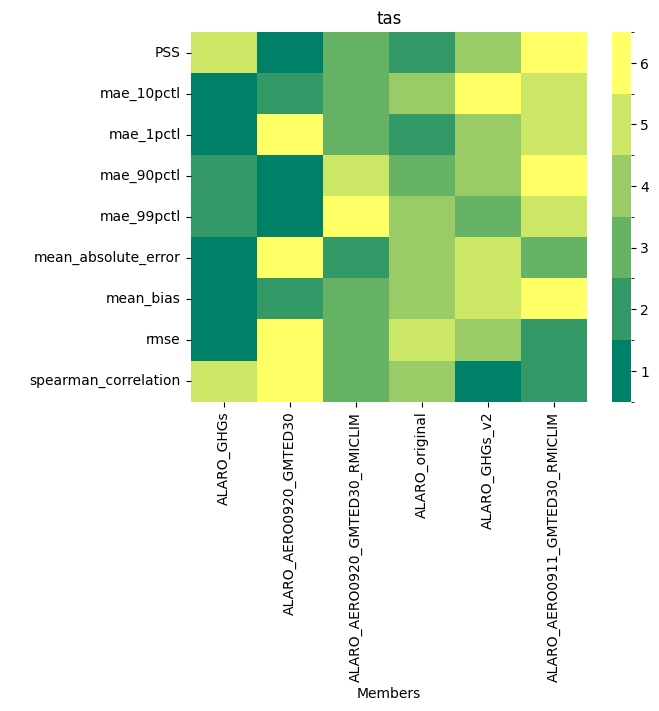

In [10]:
MetricsRankings.plot(out, title="tas")